# CNN + TL

# Librerías

In [2]:
'''El modulo os proporciona y expone los detalles y la funcionalidad del sistema operativo.'''
import os
'''OpenCV proporciona funcionalidad enfocada en el desarrollo de aplicaciones de Vision Artificial.'''
import cv2
'''Libreria encargada de realizar calculos y analisis matematicos.'''
import numpy as np
'''Es una biblioteca que agrega soporte para abrir, manipular y guardar muchos formatos de archivos de imágenes diferentes.'''
from PIL import Image
'''Libreria encargada de realizar diferentes representaciones graficas.'''
import matplotlib.pyplot as plt
'''Se utiliza para dividir todos los datos en dos subconjuntos (Train y Test) que se utilizan para entrenar y probar los datos.'''
from sklearn.model_selection import train_test_split
'''Se comporta como un diccionario python, por lo que se pueden realizar todas las operaciones comunes del diccionario como get y set.'''
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
'''Se puede convertir en una matriz numpy o una matriz que tiene valores binarios y tiene columnas iguales al número de categorías en los datos.'''
from tensorflow.keras.utils import to_categorical
'''Uso del modelo MobileNetV2, de los que se pueden tomar muchos mas modelos relacionanos a Transferencia de aprendizaje.'''
from tensorflow.keras.applications import MobileNetV2
'''Preprocesa un tensor o matriz Numpy que codifica un lote de imágenes.'''
from tensorflow.keras.applications.mobilenet import preprocess_input
'''Es la API de alto nivel de TensorFlow para construir y entrenar modelos de aprendizaje profundo.'''
from tensorflow.keras import layers, models
'''Reducir la tasa de aprendizaje cuando una métrica ha dejado de mejorar.'''
from tensorflow.keras.callbacks import EarlyStopping
'''Biblioteca de DL que puede procesar datos, construir y entrenar modelos de Machine Learning, servir los modelos entrenados.'''
import tensorflow as tf
'''modulos que permiten realizar los calculos de las metricas de exactitud, precision, entre otras.'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargar el conjunto de datos

In [3]:
'''Determinar la ruta en la que se encuentra la division de las carpetas con las imagenes o datos.'''
fpath = 'C:/Users/ASUS/anaconda3/Mineria/Mineria/eliminar_ruido'
'''Variable en la que se realiza un random de 9 imagenes.'''
random_seed = 9
'''Obtiene la lista de todos los archivos y directorios en el directorio especificado.'''
categories = os.listdir(fpath)
'''Impresion del contenido de la variable categories.'''
print("Lista de categorías = ",categories,"\n\nNumero de categorias = ", len(categories))

Lista de categorías =  ['con_mascara', 'sin_mascara'] 

Numero de categorias =  2


In [4]:
'''Funcion encargada de cargar imágenes y etiquetas'''
def load_images_and_labels(categories):
    #creacion de una variable de tipo array que va a contener las imagenes
    img_lst=[]
    #creacion de una variable ded tipo array que va a contener las etiquetas
    labels=[]
    #tamaño estandar para todas las imagenes
    TAMANO_IMG = 100
    #ciclo encargado de recorrer todas las carpetas
    for index, category in enumerate(categories):
        #ciclo encargado de recorrer el contenido de una carpeta
        for image_name in os.listdir(fpath+"/"+category):
            #devuelve una matriz 2D o 3D basada en el número de canales de color presentes en la imagen
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            #estandarizacion de un solo tamaño para todas las imagenes
            img = cv2.resize(img, (TAMANO_IMG, TAMANO_IMG))
            #definicion del color que contine las imagenes
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            #representar distintos colores a partir de la mezcla de estos tres colores primarios
            img_array = Image.fromarray(img, 'RGB')
            # permite agregar nuevos elementos a una lista en este caso las imagenes
            img_lst.append(np.array(img_array))
            # permite agregar nuevos elementos a una lista en este caso las etiquetas
            labels.append(index)
    #retorno de la lista de imagenes y etiquetas
    return img_lst, labels
'''Uso de la funcion que permite la carga de las imagenes y etiquetas'''
images, labels = load_images_and_labels(categories)
'''Impresion del numero las imagenes y etiquetas que se han cargado'''
print("Numero de imagenes cargadas = ",len(images),"\nNumero de etiquetas cargadas= ",len(labels))
print(type(images),type(labels))


Numero de imagenes cargadas =  6718 
Numero de etiquetas cargadas=  6718
<class 'list'> <class 'list'>


In [5]:
'''crear un array a partir de un iterador como una simple lista de imagenes'''
images = np.array(images)
'''crear un array a partir de un iterador como una simple lista de etiquetas'''
labels = np.array(labels)
'''Impresion de las etiquetas e imagenes'''
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
'''Impresion de los tipos de datos que se han ejecutado'''
print(type(images),type(labels))

Images shape =  (6718, 100, 100, 3) 
Labels shape =  (6718,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


# Visualización de imágenes del conjunto de datos

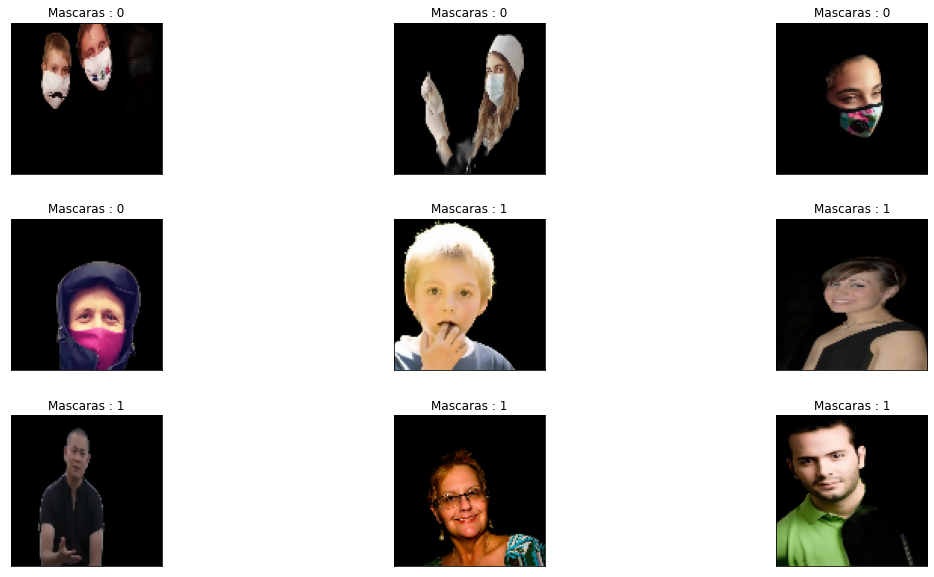

In [6]:
'''Funcion que permite visualizar nueve imagenes aleatorias'''
def display_rand_images(images, labels):
    #tamaño de las figuras que se van a mostrar
    plt.figure(1 , figsize = (19 , 10))
    #variable contador de imagenes
    n = 0 
    #ciclo que se encarga de elegir nueve imagenes aleatorias
    for i in range(9):
        #contador de imagenes
        n += 1 
        #uso de la funcion random para no tomar imagenes secuenciales
        r = np.random.randint(0 , images.shape[0] , 1)
        #crea una figura con ejes
        plt.subplot(3 , 3 , n)
        #ajustar el diseño de la subtrama
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        #mostrar una imagen en una ventana
        plt.imshow(images[r[0]])
        #titulo de las imagenes que se van a visualizar
        plt.title('Mascaras : {}'.format(labels[r[0]]))
        # establecer las ubicaciones y etiquetas en el eje x
        plt.xticks([])
        # establecer las ubicaciones y etiquetas en el eje y
        plt.yticks([])
    #ejecucion de la grafica   
    plt.show()
'''Llamado de la funcion que permite visualizar nueve imagenes aleatorias.'''  
display_rand_images(images, labels)

# Preparar datos para entrenar un modelo CNN

In [7]:
'''Primer paso en el barajado de datos'''

'''obtener números igualmente espaciados en un rango dado'''
n = np.arange(images.shape[0])
'''Impresion de los valores que contiene la variable n'''
print("'n' valores antes de barajar = ",n)

'''Barajar todos los valores igualmente espaciados en la lista 'n' '''
np.random.seed(random_seed)
'''Se utiliza para mezclar una secuencia (lista)'''
np.random.shuffle(n)
'''Imprimir valores barajados'''
print("\n'n' valores despues de barajar = ",n)

'n' valores antes de barajar =  [   0    1    2 ... 6715 6716 6717]

'n' valores despues de barajar =  [2602 3649 3401 ...  501 4444  382]


In [8]:
'''Segundo paso en el barajado de los datos'''

'''mezclar imágenes y datos de etiquetas correspondientes en ambas listas'''
images = images[n]
labels = labels[n]
print("Forma de las imágenes después de barajar = ",images.shape,"\nForma de las etiquetas después de barajar = ",labels.shape)

Forma de las imágenes después de barajar =  (6718, 100, 100, 3) 
Forma de las etiquetas después de barajar =  (6718,)


In [9]:
'''realiza una copia de un array aplicandole otro tipo de datos utilizando el método asociado a un array en las imagenes'''
images = images.astype(np.float32)
'''realiza una copia de un array aplicandole otro tipo de datos utilizando el método asociado a un array en las etiquetas'''
labels = labels.astype(np.int32)
images = images/255
'''Impresion de las imagenes'''
print("Forma de las imágenes después de la normalización = ",images.shape)

Forma de las imágenes después de la normalización =  (6718, 100, 100, 3)


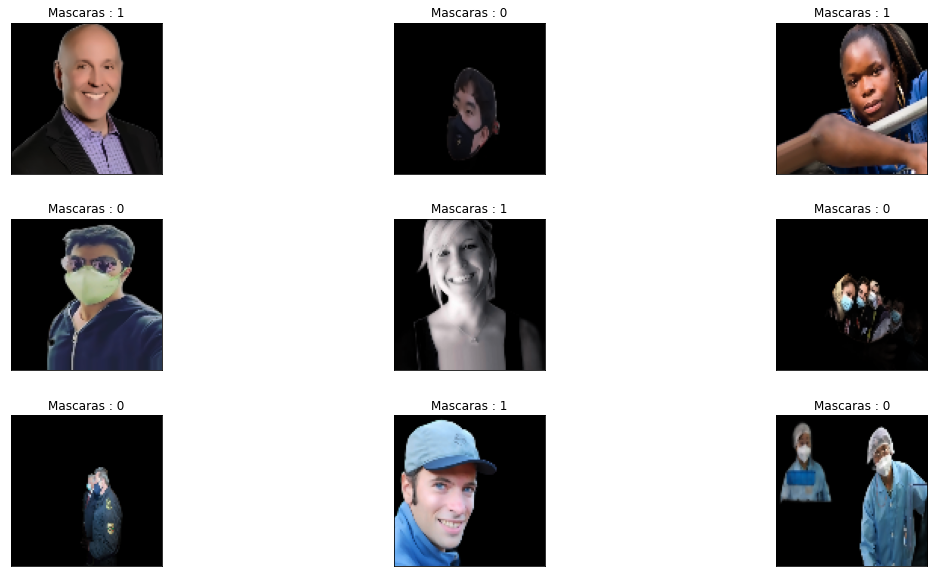

In [10]:
'''Llamado de la funcion de mostrar imagenes aleatorias'''
display_rand_images(images, labels)

In [11]:
'''Division del conjunto de datos para que se puedan ejecutar en distintos porcentajes de entrenamiento y pruebas'''
train_ds, test_ds, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)
'''longitud de entrenamiento de imagenes '''
print("train_ds shape = ",train_ds.shape)
'''longitud de entrenamiento de etiquetas '''
print("train_labels shape = ",train_labels.shape)
'''longitud de pruebas de imagenes '''
print("\ntest_ds shape = ",test_ds.shape)
'''longitud de pruebas de etiquetas '''
print("test_labels shape = ",test_labels.shape)

train_ds shape =  (5374, 100, 100, 3)
train_labels shape =  (5374,)

test_ds shape =  (1344, 100, 100, 3)
test_labels shape =  (1344,)


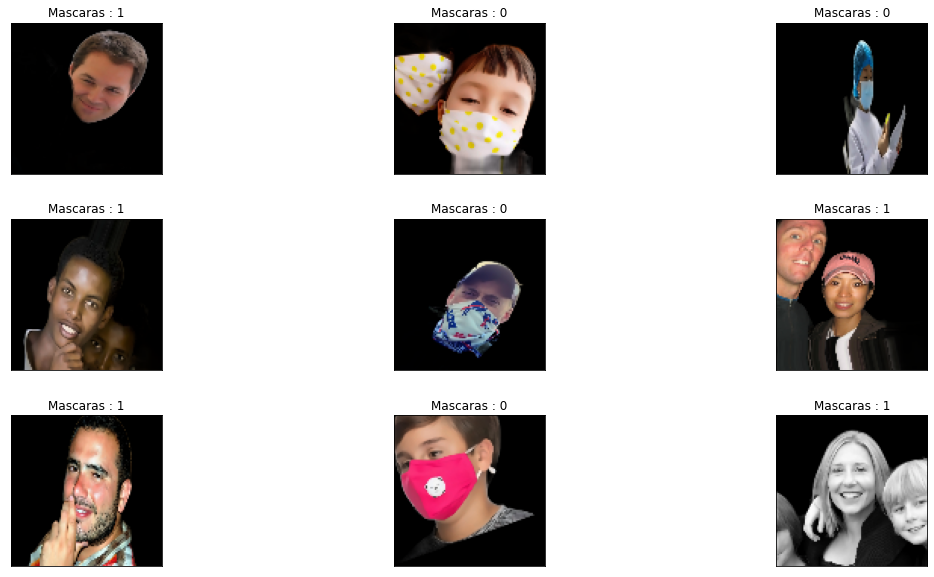

In [12]:
'''Llamado de la funcion de mostrar imagenes aleatorias'''
display_rand_images(train_ds, train_labels)

In [13]:
'''Tamaño estandar para las imagenes que pertenecen al entrenamiento'''
train_ds = tf.image.resize(train_ds, (100, 100))
'''Tamaño estandar para las imagenes que pertenecen a las pruebas'''
test_ds = tf.image.resize(test_ds, (100, 100))

Define CNN model

In [15]:
'''Cargando el modelo MobileNetV2'''
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
'''Pesos no entrenables'''
base_model.trainable = False

'''Entrada de preprocesamiento para los datos de entrenamiento'''
train_ds = preprocess_input(train_ds) 
'''Entrada de preprocesamiento para los datos de pruebas'''
test_ds = preprocess_input(test_ds)

9420800/9406464 [==============================] - 5s 1us/step


In [16]:
'''Suma todos los elementos de la array'''
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 50, 50, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 50, 50, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 50, 50, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [17]:
'''Devuelve una matriz unidimensional '''
flatten_layer = layers.Flatten()
'''Uso de la funcion de activacion de kernel 'relu' '''
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
'''Uso de la funcion de activacion softmax '''
prediction_layer = layers.Dense(5, activation='softmax')
'''Permite crear un modelo de aprendizaje profundo'''
model = models.Sequential([
    #modelo base
    base_model,
    #capa aplanamiento
    flatten_layer,
    #capa densa 1
    dense_layer_1,
    #capa densa 2
    dense_layer_2,
    #prediccion de la capa
    prediction_layer
])

In [18]:
%%time
'''Se proporciona al sistema la función de pérdidas que queremos minimizar durante el entrenamiento'''
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    #metricas de exactitud
    metrics=['accuracy'],
)

history = model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
135/135 [==============================] - 31s 184ms/step - loss: 0.7466 - accuracy: 0.4890 - val_loss: 0.6973 - val_accuracy: 0.4828
Epoch 2/50
135/135 [==============================] - 22s 161ms/step - loss: 0.6936 - accuracy: 0.5269 - val_loss: 0.6844 - val_accuracy: 0.5553
Epoch 3/50
135/135 [==============================] - 22s 165ms/step - loss: 0.6893 - accuracy: 0.5413 - val_loss: 0.7227 - val_accuracy: 0.4828
Epoch 4/50
135/135 [==============================] - 21s 159ms/step - loss: 0.7153 - accuracy: 0.5297 - val_loss: 0.7387 - val_accuracy: 0.4865
Epoch 5/50
135/135 [==============================] - 23s 170ms/step - loss: 0.6901 - accuracy: 0.5587 - val_loss: 0.6685 - val_accuracy: 0.6009
Epoch 6/50
135/135 [==============================] - 22s 161ms/step - loss: 0.6833 - accuracy: 0.5659 - val_loss: 0.6980 - val_accuracy: 0.5126
Epoch 7/50
135/135 [==============================] - 22s 163ms/step - loss: 0.6638 - accuracy: 0.6013 - val_loss: 0.6583 - val_ac

In [19]:
'''Evaluacion de la exactitud'''
_, acc = model.evaluate(test_ds, test_labels, verbose=0)
'''Ejecucion de la exactitud'''
print('> %.2f' % (acc * 100.0))

> 62.65


In [20]:
model_probs = model.predict(test_ds, verbose=0)
'''predecir las clases nítidas para el conjunto de pruebas'''
model_classes = np.argmax(model_probs,axis=1)
'''reducir a 1d array'''
model_probs = model_probs[:, 0]
 
'''exactitud: (tp + tn) / (p + n)'''
accuracy = accuracy_score(test_labels, model_classes)*100
'''precision tp / (tp + fp)'''
precision = precision_score(test_labels, model_classes, average='weighted')*100
'''recall: tp / (tp + fn)'''
recall = recall_score(test_labels, model_classes, average='weighted')*100
'''f1: 2 tp / (2 tp + fp + fn)'''
f1 = f1_score(test_labels, model_classes, average='weighted')*100

print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)

Accuracy: 62.65
F1 score: 62.58
Precision: 62.82
Recall: 62.65


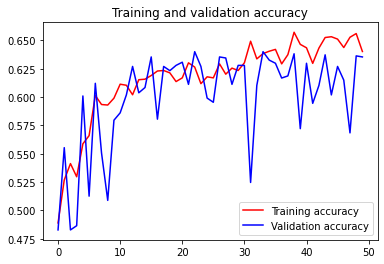

<Figure size 432x288 with 0 Axes>

In [21]:
'''Exactitud '''
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(len(accuracy))
'''Primera linea ejecutada en la que se muestran el history del entrenamiento de la exactitud'''
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
'''Segunda linea ejecutada en la que se muestran el history del validacion de la exactitud'''
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
'''Titulo de la grafica'''
plt.title('Training and validation accuracy')
'''colocar leyenda en los ejes'''
plt.legend(loc=0)
plt.figure()
'''Ejecucion de la grafica'''
plt.show()

In [22]:
model.save('./MobileNetV2.h5')

C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
